# Street View House Number (SVHN)

In [29]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage import color
from skimage.color import rgb2gray
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [30]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('/home/thasleem/Documents/CMPE 257/train_32x32.mat')
X_test, y_test = load_data('/home/thasleem/Documents/CMPE 257/test_32x32.mat')
X_extra,y_extra = load_data('/home/thasleem/Documents/CMPE 257/extra_32x32.mat')
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)
print("Extra training Set", X_extra.shape, y_extra.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Extra training Set (32, 32, 3, 531131) (531131, 1)


In [31]:
# Transpose the image arrays
X_train, y_train = X_train.transpose(3,0,1,2), y_train[:,0]
X_test, y_test = X_test.transpose(3,0,1,2), y_test[:,0]
X_extra, y_extra = X_extra.transpose(3,0,1,2), y_extra[:,0]
print("Training Set", X_train.shape,y_train.shape)
print("Test Set", X_test.shape)
print("Extra Set", X_extra.shape)
print('')


Training Set (73257, 32, 32, 3) (73257,)
Test Set (26032, 32, 32, 3)
Extra Set (531131, 32, 32, 3)



In [32]:
#Slicing the numpy array to limit the data.
X_train = X_train[1:50001,:,:,:]
y_train = y_train[1:50001]
X_extra = X_extra[1:50001,:,:,:]
y_extra = y_extra[1:50001]
X_test = X_test[1:10001,:,:,]
y_test = y_test[1:10001]

In [33]:
#create a np array with training set and extra set
X_tr = np.concatenate((X_train,X_extra))
y_tr = np.concatenate((y_train,y_extra))

In [34]:
print("Training Set", X_tr.shape, y_tr.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (100000, 32, 32, 3) (100000,)
Test Set (10000, 32, 32, 3) (10000,)


In [35]:
# Calculate the total number of images
num_images = X_tr.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Total Number of Images 110000


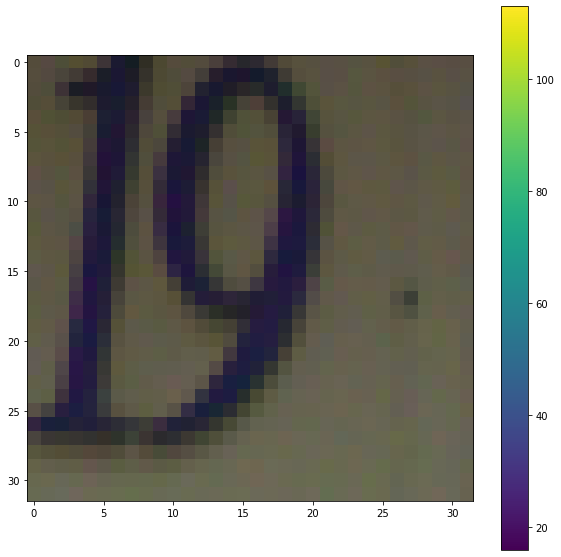

In [36]:
plt.figure()
plt.imshow(X_tr[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
np.amax(X_tr)

255

Scale these values to a range of 0 to 1 before feeding them to model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [38]:
X_trx = X_tr/255
X_te = X_test/255

In [39]:
print(np.unique(y_tr))
print(np.unique(y_test))
print(y_tr.shape)

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
(100000,)


In [40]:
#del to save memory
del X_train,X_test,X_tr,X_extra,y_extra

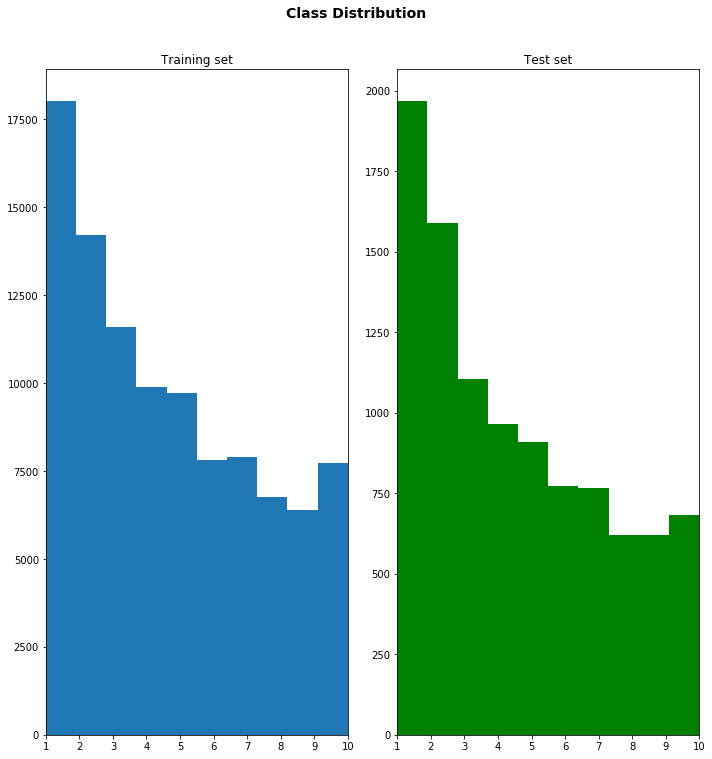

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_tr, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

In [42]:
def plot_images(image,label,size):
    for i in range(size):
        plt.subplot(1,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i],cmap=plt.cm.gray)
        plt.title(label[i])
    plt.show()

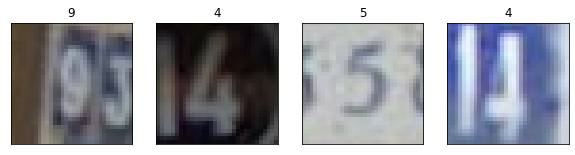

In [43]:
#display few random images from the training set.
rand_im = [5, 70, 500, 40999]
plot_images(X_trx[rand_im],y_tr[rand_im],len(rand_im))

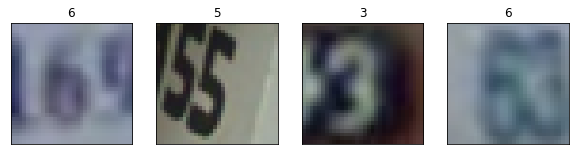

In [44]:
#display few random images from the test set.
rand_im = [789, 999,7000,8000]
plot_images(X_te[rand_im],y_test[rand_im],len(rand_im))

In [45]:
y_tr[y_tr == 10] = 0
y_test[y_test == 10] = 0

In [46]:
print(np.unique(y_tr))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [47]:
X_trx_gray = rgb2gray(X_trx).astype(np.float32)
X_te_gray = rgb2gray(X_te).astype(np.float32)

In [48]:
del X_trx,X_te

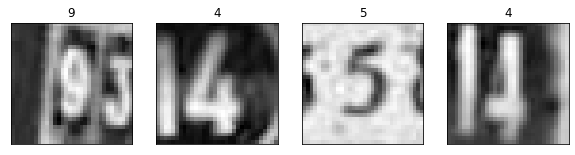

In [49]:
#display few random images from the training set.
rand_im = [5, 70, 500, 40999]
plot_images(X_trx_gray[rand_im],y_tr[rand_im],len(rand_im))

In [50]:
print("Training Set", X_trx_gray.shape)
print("Test Set", X_te_gray.shape)

Training Set (100000, 32, 32)
Test Set (10000, 32, 32)


In [51]:
tr_im = np.expand_dims(X_trx_gray, axis = 3)
te_im = np.expand_dims(X_te_gray, axis = 3)

In [52]:
print("Training Set", tr_im.shape)

Training Set (100000, 32, 32, 1)


In [53]:
#convert array of labeled data to one-hot vector.
y_trx_oh = np.squeeze(np.eye(10)[y_tr])
y_te_oh = np.squeeze(np.eye(10)[y_test])

In [54]:
print(y_trx_oh.shape)

(100000, 10)


In [55]:
import h5py

# Create file
h5f = h5py.File('SVHN_ready.h5', 'w')

# Store the datasets
h5f.create_dataset('X_trx_gray', data=X_trx_gray)
h5f.create_dataset('y_trx', data=y_tr)

h5f.create_dataset('X_te_gray', data=X_te_gray)
h5f.create_dataset('y_te', data=y_test)

h5f.create_dataset('tr_im', data=tr_im)
h5f.create_dataset('y_trx_oh', data=y_trx_oh)
h5f.create_dataset('te_im', data=te_im)
h5f.create_dataset('y_te_oh', data=y_te_oh)

# Close the file
h5f.close()